# **Assignment 2 DS : Data Similarity**

Anggota Kelompok :


1. Wanda Yusuf Alvian	(19/448735/PPA/05818)
2. Hari Surrisyad (19/448705/PPA/05788)
3. Muhammad Irfan Indriyan (19/448713/PPA/05796)




## 1. Data Document

In [0]:
import pandas as pd
from collections import Counter
import math

In [0]:
data_path = 'http://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv'

data = pd.read_csv(data_path)
data.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


### Cosine Similarity

In [0]:
def doc_similarity(doc1, doc2):
  c1 = Counter(doc1.split())
  c2 = Counter(doc2.split())
  terms = set(c1).union(c2)
  dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
  magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
  magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
  return dotprod / (magA * magB)

In [0]:
doc1 = data['content'][0]
doc2 = data['content'][1]

print('Similarity Measure :', doc_similarity(doc1, doc2))

# Similariy dalam persen, semakin mendekati 100% semakin similar

Similarity Measure : 0.0


Rreferences :


1.   https://stackoverflow.com/questions/54427663/using-cosine-similarity-for-two-text-files



## 2. Data Time Series

### Correlation Coefficient

In [0]:
#Explore Data
import pandas as pd
import numpy as np
data = pd.read_csv('https://timeseries.weebly.com/uploads/2/1/0/8/21086414/_visitors.csv', sep = ',')

#lima data pertama
print(data.head(5))

     Date  Australia  China, People's Republic of  Japan  United Kingdom
0  1998Q4      20288                         1089   5938           13831
1  1999Q1      22047                         1492   6925           23271
2  1999Q2      14362                         1450   4353            9756
3  1999Q3      15775                         1551   6855            7899
4  1999Q4      21209                         2020   6216           15778


In [0]:
#Similarity antara visitor Australia dengan China
doc1 = data['Australia']
doc2 = data['China, People\'s Republic of']

def timeseries_similarity(doc1, doc2):
    return doc1.corr(doc2)
print(timeseries_similarity(doc1, doc2))

0.514040455599168


In [0]:
#call function
#Similarity antara visitor Australia dengan Jepang
print(timeseries_similarity(data['Japan'], data['Australia']))

-0.12769976670685487


In [0]:
#Similarity antara Japan dengan United Kingdom
print(timeseries_similarity(data['Japan'], data['United Kingdom']))

0.35726026594832816


In [0]:
#Similarity antara visitor China dengan Japan
print(timeseries_similarity(data['China, People\'s Republic of'], data['Japan']))

-0.012998270685293934


In [0]:
#Similarity antara Visitor Australia dengan UK
print(timeseries_similarity(data['Australia'], data['United Kingdom']))

0.7364743157628297


### Euclidean Distance 

The Euclidean distance between two time series can be visualized as the square root of the sum of the squared length ofthe vertical hatch lines (Batista et al., 2013)

In [0]:
#def timeseries_euclid(data1, data2):

from math import sqrt

temp = 0

#fungsi untuk menghitung euclidean distance
def ts_euclideandist(data1, data2):
    for i in range(54):
        global temp
        temp += (data1[i] - data2[i])**2
    return sqrt(temp)

#### Call function

In [0]:
#Similarity distance antara data Australia dengan Jepang
print(ts_euclideandist(data['Australia'], data['Japan']))

171762.48199475926


In [0]:
#Similarity distance antara data Australia dengan China
print(ts_euclideandist(data['Australia'], data['China, People\'s Republic of']))

243584.21952786678


In [0]:
Reference:

Batista, Gustavo & Keogh, Eamonn & Tataw, Oben & Alves de Souza, Vinícius. (2013). CID: An efficient complexity-invariant distance for time series. Data Mining and Knowledge Discovery. 28. 10.1007/s10618-013-0312-3.

## 3. Data Graph

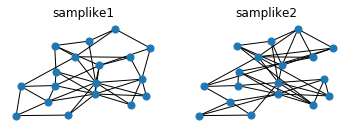

In [0]:
import zipfile

import matplotlib.pyplot as plt
import networkx as nx


zf = zipfile.ZipFile('sampson_data.zip')  # zipfile object
e1 = StringIO(zf.read('samplike1.txt'))  # read info file
e2 = StringIO(zf.read('samplike2.txt'))  # read info file

G1 = nx.read_edgelist(e1, delimiter='\t')
G2 = nx.read_edgelist(e2, delimiter='\t')

pos = nx.spring_layout(G1, iterations=100)
plt.clf()

plt.subplot(221)
plt.title('samplike1')
nx.draw(G1, pos, node_size=50, with_labels=False) # node size adalah ukuran dari node bukan jumlah node 
plt.subplot(222)
plt.title('samplike2')
nx.draw(G2, pos, node_size=50, with_labels=False)
plt.show()

In [0]:
def select_k(spectrum, minimum_energy = 0.9):
    running_total = 0.0
    total = sum(spectrum)
    if total == 0.0:
        return len(spectrum)
    for i in range(len(spectrum)):
        running_total += spectrum[i]
        if running_total / total >= minimum_energy:
            return i + 1
    return len(spectrum)

def similarity(G1,G2):
    laplacian1 = nx.spectrum.laplacian_spectrum(G1)
    laplacian2 = nx.spectrum.laplacian_spectrum(G2)

    k1 = select_k(laplacian1)
    k2 = select_k(laplacian2)
    k = min(k1, k2)

    return sum((laplacian1[:k] - laplacian2[:k])**2)



print(similarity(G1,G2))


5.310187217258027


references :
1. https://stackoverflow.com/questions/12122021/python-implementation-of-a-graph-similarity-grading-algorithm
2. https://www.cs.cmu.edu/~jingx/docs/DBreport.pdf
3. https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_sampson.html